In [45]:
!pip install googletrans==4.0.0-rc1
# 출처: https://intstorage.tistory.com/entry/파이썬을-이용한-구글-번역-API-활용법 [Interesting Story Storage:티스토리]

  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=068829d36a5933d9eb12fa8372da839f7ceb40b5a72d314fdc951f7eb71634ee
  Stored in directory: /aiffel/.cache/pip/wheels/60/b3/27/d8aff3e2d5c2d0d97a117cdf0d5f13cd121e2c2b5fb49b55a0
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [58]:
from googletrans import Translator
translator = Translator()

#번역
def translate(sentence, type_='en'):
    translator = Translator()
    temp = translator.translate(sentence, dest=type_)
    return translator.translate(temp.text, dest='ko').text

In [4]:
import os
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data_path =  os.getenv('HOME')+"/aiffel/prj/train_bert.csv"
df = pd.read_csv(data_path)

In [96]:
import sentencepiece as spm

#sentencepiece 학습
with open('doc.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(df['text']))

temp_file = 'doc.txt'
vocab_size = 20000

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)

!ls -l korean_spm*



sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=doc.txt --model_prefix=korean_spm --vocab_size=20000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: doc.txt
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 20000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  

-rw-r--r-- 1 root root 1046622 Nov  7 09:12 korean_spm_large.model
-rw-r--r-- 1 root root  844303 Nov  7 09:12 korean_spm_large.vocab
-rw-r--r-- 1 root root  619503 Nov 21 03:55 korean_spm.model
-rw-r--r-- 1 root root  399760 Nov 21 03:55 korean_spm.vocab


In [149]:
#원문
df['text'][11]

#국어 > 일어 > 영어 > 국어

'야 너 휴대폰좀 빌려줘봐 안돼 지난달에도 휴대폰 요금이 너무 많이 나와서 엄마한테 혼났어 알 바야 닥치고 폰이나 내놔 폰 주면 또 결제하려고 그러지  응 게임 캐시 다떨어져서 충전좀 안돼 진짜 맞고 줄래 그냥 줄래 진짜 한번만 더 결제한거 들켰다가는 휴대폰 뺏길지도 몰라 아 씨 오늘따라 왜이렇게 말이 많아 당장 안내놔 제발 '

In [158]:
translator = Translator()
sentence = df['text'][12]
print(sentence)
print('')
temp = translator.translate(sentence, dest='ja')
temp = translator.translate(temp.text, dest='en')
print(translator.translate(temp.text, dest='ko').text)
print('')
print(translate(sentence, type_='ja'))
print('')
print(translate(sentence))

네네 무슨 일 때문에 전화주셨나요 우리 애가 지우개 하나 훔친거 가지고 애들 앞에서 면박줬니 그런게 아니고 댁 내 따님분이 한 두번 훔친것도 아니고 여러번 훔친 게 확인 되어서 경찰부르는건 너무 심할거 같아서 꾸중 한 마디 한겁니다 아니 그 구멍가게 물건이 얼마 한다고 그러냐고 내 애가 맨날 훔친거 확실해 네 본 애들도 있고 확실합니다 됐고 내 애 울면서 하교 했어 이번 일 각오하는 게 좋을거야 너도 애 있다며 제 애까지 끌어들이지 마세요 내 애도 울면서 들어왔는데 그냥 못 넘어가 니 애 죽여버릴거야 이러지 마세요 저도 곤란합니다 단지 교육 차원에서 한 마디 했을 뿐이라고요 됐고 아 저기 네 애 보이네 죽여버릴테니까 니 아들 죽은거 보고 그때 반성해 남 애 함부로 울리면 어떻게 되는지

내 아이가 지우개 앞에서 한 지우개를 훔쳐서 부러 뜨렸다. 나는 내 아이가 항상 훔치고 있다고 확신한다. 나는 4 명의 자녀가 있고, 나는 확실히 울고 거부했다.child. 이걸 준비하는 것이 좋다. 나는 그것을 버리지 않는다. 나는 또한 이것을하기가 어려웠다.

직업을 위해 무엇을 부르 셨나요?내 아이는 지우개 앞에서 한 지우개를 훔쳐서 파산했습니다.나는 내 아이가 항상 훔치고 있다고 확신합니다.나는 4 명의 자녀가 있고 확실합니다.'확실히 아이를 울고 거부했습니다.이것을 준비하는 것이 좋습니다.나는 그것을 버리지 않습니다.나는 또한 이것을하기가 어려웠다.

직업을 위해 무엇을 부르 셨나요?내 아이는 한 번의 지우개를 훔치고 아이들 앞에서 그것을 박살 냈습니다. 나는 내 아이가 항상 훔치고 있다고 확신합니다.나는 4 명의 아이들이 있고 확실합니다. 그리고 나는 아이들을 울고 해산했다고 확신합니다.이것에 대비하는 것이 좋습니다. 나는 그것을 버리지 않을 것입니다.나도 이것도하기가 어려웠다.


In [150]:
#일어
translate(df['text'][11], type_='ja')

'이봐, 당신은 나에게 휴대폰을 빌려 줄 수 없다.지난 달, 나는 많은 휴대 전화를 가지고 있었기 때문에 어머니에게 SC였습니다.휴대폰이있을 수 있습니다.'

In [151]:
#영어
translate(df['text'][11])

'이봐, 당신은 나에게 휴대 전화를 빌려 줄 수 없다.지난 달, 나는 휴대 전화 요금이 많았 기 때문에 엄마에 의해 꾸짖 었습니다. 나는 휴대 전화를 받고 있을지도 모릅니다.'

In [38]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)
# print(df_shuffled)
df_shuffled['text'][0]

'박인턴 올해 나이가 25이라고 했나 네 맞습니다  하 내가 이래서 사회 초년생은 들이려고 안했는데 네 저에게 무슨 문제라도 있으신가요  아니 박인턴이 우리 팀 들어오고 나서 한 번도 제대로 일이 풀린 적이 없지않나 그치만 제가 잘못을 해서 사회생활을 해봤어야 알지 뭐든 어설프고 참  이래서 어린친구들은 쓰고 싶지가 않아 대리님 죄송합니다 그치만 저 폐가 되지 않도록 열심히 업무에 집중하고 있습니다 요즘 애들은 말야 쫌만 힘들면 관두네 어렵네 투덜투덜 아주 회사가 우습지 놀러다니는 데도 아니고 저번에 한 번 전달드린 내용은 정말 제가 미처 전달받지 못했던 업무 내용이라 어려워서 그러니까 아니 애야 학생이야 어떻게 1부터 다 알려주나 그럴거면 학생을 데려다 일 시키지 쯧쯧'

In [244]:
def class_label(data):
    class_lst = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']

    for i in range(len(data)):
        if data['class'][i] == class_lst[0]: #협박 대화
            data['class'][i] = 0
        elif data['class'][i] == class_lst[1]: #갈취 대화
            data['class'][i] = 1
        elif data['class'][i] == class_lst[2]: #직장 내 괴롭힘 대화
            data['class'][i] = 2
        elif data['class'][i] == class_lst[3]: #기타 괴롭힘 대화
            data['class'][i] = 3
    return data
    

def translate(sentence, type_='en'):
    translator = Translator()
    temp = translator.translate(sentence, dest=type_)
    return translator.translate(temp.text, dest='ko').text

def back_translation(data):
    data_shuffled = data.sample(frac=1).reset_index(drop=True) #데이터의 위치를 셔플

    for i in range(int(len(data)/10)):
        if i // 2 == 0:
            data_shuffled['text'][i] = translate(data_shuffled['text'][i]) #짝수일경우 kr > en > kr
        elif i // 2 ==1:
            data_shuffled['text'][i] = translate(data_shuffled['text'][i], type_='ja') #홀수일경우 kr > ja > kr 
    return data_shuffled



# back_translation(df).head()

In [247]:
back_translation(df).head()

,idx,class,conversation,text,bert_text
0,815,2,나씨 초과근무 왜 올리는거에요?\n네? 그날 사업이 늦게 끝나서요.\n컴퓨터 앞에 ...,왜 초과 근무를하고 있습니까?당신의 사업이 늦었습니다.,[CLS] 나씨 초과근무 왜 올리는거에요? [SEP] 네? 그날 사업이 늦게 끝나서...
1,3924,0,때리지 말아줘\n 아퍼? 아프면 참아봐.\n나 이미 충분히 병원다니고 있어.\n병원...,나를 때리지 마십시오. 아프면 병원이되어야합니다.나는 이미 병원에 갈거야.당신은 죽...,[CLS] 때리지 말아줘 [SEP] 아퍼? 아프면 참아봐. [SEP] 나 이미 충분...
2,2860,2,원영 학생 지금 교수실로 와.\n예 교수님. 저 지금 스케줄 없습니다.\n지금 우리...,지금은 일정이 없습니다.지금은 일정이 없습니다.지금은 일정이 없습니다.나는 아들의 ...,[CLS] 원영 학생 지금 교수실로 와. [SEP] 예 교수님. 저 지금 스케줄 없...
3,2765,2,김선생님 이리 와 보세요\n네 고선생님 무슨 일이시죠?\n이런건 왜 쓰고 제자리에 ...,Kim Sun Ray가 여기 있습니다.나는 운이 좋지 않지만 일하러 올 때는 운이 ...,[CLS] 김선생님 이리 와 보세요 [SEP] 네 고선생님 무슨 일이시죠? [SEP...
4,3563,1,민수야 나 토토하게 5만원만 빌려줘\n 너 저번에도 3만원 빌리고 안 갚았잖아.\n...,민수야 나 토토하게 만원만 빌려줘 너 저번에도 만원 빌리고 안 갚았잖아 이번에 따...,[CLS] 민수야 나 토토하게 5만원만 빌려줘 [SEP] 너 저번에도 3만원 빌리고...


In [98]:
#sp 예시
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds(df['text'][0])
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces(df['text'][0],1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[149, 551, 3082, 34, 611, 28, 574, 16355, 602, 627, 2346, 3586, 26, 3586, 2076, 7, 393, 634, 16534, 31, 6708, 149, 2654, 9224, 1055, 299, 51, 34, 926, 926, 3120, 3586, 2076, 551, 1744, 19, 89, 64, 7895, 6708, 160, 25, 14880, 160, 144, 352, 19, 1057, 5475, 3586]
['▁나는', '▁당신이', '▁스스로', '를', '▁죽', '▁이', '도록', '▁격', '려', '하지', '▁않습니다', '.', '▁죄송합니다', '.', '▁만약', '▁내가', '▁혼자', '▁죽을', '▁것이라', '면', ',', '▁나는', '▁혼자서', '▁죽었', '▁기', '▁때문에', '▁우리', '를', '▁죽이고', '▁죽이고', '▁싶습니다', '.', '▁만약', '▁당신이', '▁그것', '을', '▁할', '▁수', '▁없다면', ',', '▁당신', '은', '▁당신과', '▁당신', '의', '▁가족', '을', '▁죽일', '▁것입니다', '.']
나는 당신이 스스로를 죽 이도록 격려하지 않습니다. 죄송합니다. 만약 내가 혼자 죽을 것이라면, 나는 혼자서 죽었 기 때문에 우리를 죽이고 죽이고 싶습니다. 만약 당신이 그것을 할 수 없다면, 당신은 당신과 당신의 가족을 죽일 것입니다.


In [101]:
# 불용어 lst 호출
stopwords = []
with open("stopwords.txt", "r") as f:
    for line in f:
        stopwords.append(line.replace('\n',''))#print(line.strip())
stopwords[:5]

['가', '가까스로', '가령', '각', '각각']

In [139]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#back translation 데이터를 불용어 및 토큰화 진행

def sp_tokenize(data): 
    train_data = []
    data['text'] = data['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
    
    for sentence in tqdm(data['text']): #불용어 제거 및 리스트 생성
        tokenized_sentence = s.SampleEncodeAsPieces(sentence,1, 0.0)
        stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
        train_data.append(stopwords_removed_sentence)
    
    tokenizer_sp = Tokenizer()
    tokenizer_sp.fit_on_texts(train_data)
        
    vocab_size = len(tokenizer_sp.word_index)
    train_data = tokenizer_sp.texts_to_sequences(train_data)
    
    max_lan = max(len(review) for review in train_data)
    
    train_data = pad_sequences(train_data, maxlen = max_lan)
    
    return train_data, vocab_size, tokenizer_sp

def y_categori(ydata):
    ydata = class_label(ydata)
    y=[] 
    for i in range(len(ydata)):
        y.append(ydata['class'][i])
    y_data = to_categorical(y)
    
    return y_data



In [140]:
# data augmentation 하려면 1epoch당 하기 파일 한번씩 돌려서 데이터셋 재생성
def train_data_set(data,size_=0.1, random_state=None):
    data_set = back_translation(data) #data augmentation
    X_data, vocab_size, tokenizer_sp = sp_tokenize(data_set)
    y_data = y_categori(df)
    
    x_train, x_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size= size_, shuffle=True, random_state=34)
    
    return x_train, x_valid, y_train, y_valid

x_train, x_valid, y_train, y_valid = train_data_set(df)

/tmp/ipykernel_7584/2772842773.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
100%|██████████| 3950/3950 [00:03<00:00, 1314.35it/s]


In [161]:
#증강 거치지 않은 데이터 셋
X_data, vocab_size, tokenizer_sp = sp_tokenize(df)
y_data = y_categori(df)
x_train, x_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size= 0.1, shuffle=True, random_state=34)

/tmp/ipykernel_7584/2772842773.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
100%|██████████| 3950/3950 [00:02<00:00, 1386.17it/s]


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, None, 128)         2482304   
_________________________________________________________________
lstm_20 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 516       
Total params: 2,614,404
Trainable params: 2,614,404
Non-trainable params: 0
_________________________________________________________________


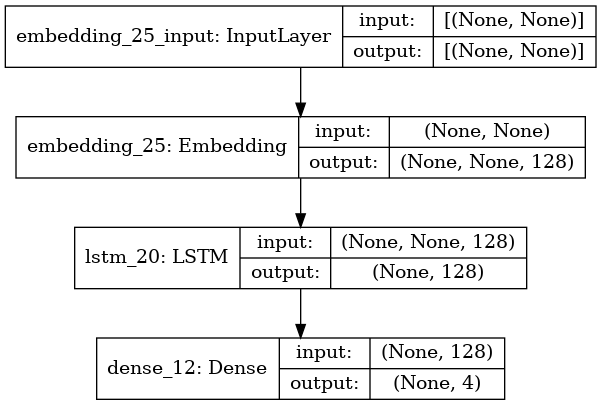

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, GlobalMaxPooling1D
from tensorflow.keras.layers import Input, Conv1D, Dropout, Concatenate, Add
from keras.models import Model

embedding_dim = 128
hidden_units = 128
num_classes = 4

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim))
lstm_model.add(LSTM(hidden_units, dropout=0.1))
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()
tf.keras.utils.plot_model(lstm_model, show_shapes=True)

In [232]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
lstm_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 2s 39ms/step - loss: 1.3596 - acc: 0.3783 - val_loss: 1.2350 - val_acc: 0.5848

Epoch 00001: val_acc improved from -inf to 0.58481, saving model to best_model.h5
Epoch 2/30
28/28 [==============================] - 1s 23ms/step - loss: 0.9472 - acc: 0.6805 - val_loss: 0.8332 - val_acc: 0.6633

Epoch 00002: val_acc improved from 0.58481 to 0.66329, saving model to best_model.h5
Epoch 3/30
28/28 [==============================] - 1s 23ms/step - loss: 0.4642 - acc: 0.8419 - val_loss: 0.5749 - val_acc: 0.7848

Epoch 00003: val_acc improved from 0.66329 to 0.78481, saving model to best_model.h5
Epoch 4/30
28/28 [==============================] - 1s 23ms/step - loss: 0.1762 - acc: 0.9536 - val_loss: 0.5265 - val_acc: 0.8152

Epoch 00004: val_acc improved from 0.78481 to 0.81519, saving model to best_model.h5
Epoch 5/30
28/28 [==============================] - 1s 23ms/step - loss: 0.0637 - acc: 0.9859 - val_loss: 0.5402 - val_acc: 0.8101

Epo

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, None, 128)         2482304   
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 516       
Total params: 2,614,404
Trainable params: 2,614,404
Non-trainable params: 0
_________________________________________________________________


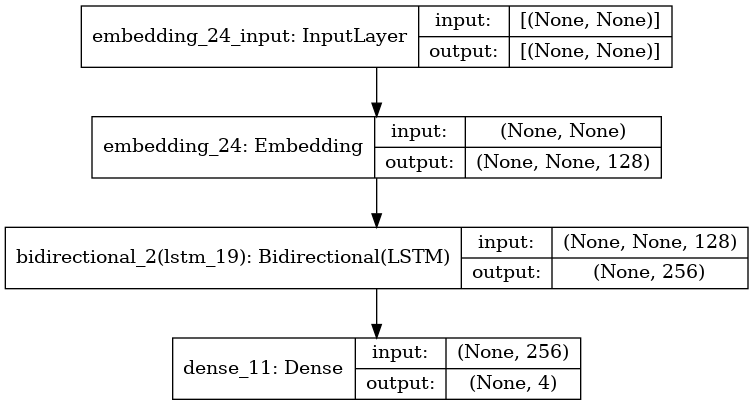

In [229]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding_dim))
bilstm_model.add(Bidirectional(LSTM(hidden_units, dropout=0.1))) # Bidirectional LSTM을 사용
bilstm_model.add(Dense(num_classes, activation='softmax'))

# tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, dropout=dropout_rate)),

lstm_model.summary()
tf.keras.utils.plot_model(bilstm_model, show_shapes=True)

In [230]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_bilstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
bilstm_history = bilstm_model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 4s 70ms/step - loss: 1.4085 - acc: 0.3412 - val_loss: 1.2203 - val_acc: 0.4456

Epoch 00001: val_acc improved from -inf to 0.44557, saving model to best_model_bilstm.h5
Epoch 2/30
28/28 [==============================] - 1s 45ms/step - loss: 1.2160 - acc: 0.5750 - val_loss: 1.1641 - val_acc: 0.5747

Epoch 00002: val_acc improved from 0.44557 to 0.57468, saving model to best_model_bilstm.h5
Epoch 3/30
28/28 [==============================] - 1s 45ms/step - loss: 0.7439 - acc: 0.7789 - val_loss: 0.7755 - val_acc: 0.7342

Epoch 00003: val_acc improved from 0.57468 to 0.73418, saving model to best_model_bilstm.h5
Epoch 4/30
28/28 [==============================] - 1s 45ms/step - loss: 0.3495 - acc: 0.8987 - val_loss: 0.6241 - val_acc: 0.7797

Epoch 00004: val_acc improved from 0.73418 to 0.77975, saving model to best_model_bilstm.h5
Epoch 5/30
28/28 [==============================] - 1s 45ms/step - loss: 0.1597 - acc: 0.9617 - val_loss: 0

In [274]:
loaded_model_lstm = load_model('best_model.h5')
print("\n lstm 테스트 정확도: %.4f" % (loaded_model_lstm.evaluate(x_valid, y_valid)[1]))

13/13 [==============================] - 0s 10ms/step - loss: 0.5265 - acc: 0.8152

 lstm 테스트 정확도: 0.8152


In [273]:
loaded_model_bilstm = load_model('best_model_bilstm.h5')
print("\n bi_lstm 테스트 정확도: %.4f" % (loaded_model_bilstm.evaluate(x_valid, y_valid)[1]))

13/13 [==============================] - 1s 17ms/step - loss: 0.5321 - acc: 0.8354

 bi_lstm 테스트 정확도: 0.8354


In [248]:
lstm_model_bt = Sequential()
lstm_model_bt.add(Embedding(vocab_size, embedding_dim))
lstm_model_bt.add(LSTM(hidden_units, dropout=0.1))
lstm_model_bt.add(Dense(num_classes, activation='softmax'))
mc = ModelCheckpoint('best_model_lstm_bt.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# lstm_model_bt.summary()
# tf.keras.utils.plot_model(lstm_model_bt, show_shapes=True)

epoch = 10
for i in range(epoch):
    x_train_bt, x_valid_bt, y_train_bt, y_valid_bt = train_data_set(df)
    lstm_model_bt.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    lstm__bt_history = lstm_model.fit(x_train_bt, y_train_bt, batch_size=128, epochs=1, callbacks=[mc], validation_data=(x_valid_bt, y_valid_bt))

/tmp/ipykernel_7584/2772842773.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
100%|██████████| 3950/3950 [00:03<00:00, 1167.22it/s]


28/28 [==============================] - 1s 27ms/step - loss: 1.6056 - acc: 0.2495 - val_loss: 1.4070 - val_acc: 0.2962

Epoch 00001: val_acc improved from -inf to 0.29620, saving model to best_model_lstm_bt.h5


100%|██████████| 3950/3950 [00:03<00:00, 1269.51it/s]


28/28 [==============================] - 1s 28ms/step - loss: 1.4227 - acc: 0.2498 - val_loss: 1.4249 - val_acc: 0.2481

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1219.45it/s]


28/28 [==============================] - 1s 27ms/step - loss: 1.4089 - acc: 0.2478 - val_loss: 1.4203 - val_acc: 0.2278

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1260.20it/s]


28/28 [==============================] - 1s 27ms/step - loss: 1.4075 - acc: 0.2588 - val_loss: 1.3999 - val_acc: 0.2734

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1268.10it/s]


28/28 [==============================] - 1s 27ms/step - loss: 1.3996 - acc: 0.2523 - val_loss: 1.4082 - val_acc: 0.2203

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1286.54it/s]


28/28 [==============================] - 1s 28ms/step - loss: 1.3937 - acc: 0.2608 - val_loss: 1.4065 - val_acc: 0.2253

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1043.10it/s]


28/28 [==============================] - 1s 28ms/step - loss: 1.3919 - acc: 0.2577 - val_loss: 1.3958 - val_acc: 0.2380

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1269.87it/s]


28/28 [==============================] - 1s 27ms/step - loss: 1.3929 - acc: 0.2568 - val_loss: 1.3883 - val_acc: 0.2633

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1282.13it/s]


28/28 [==============================] - 1s 27ms/step - loss: 1.3892 - acc: 0.2686 - val_loss: 1.3860 - val_acc: 0.2911

Epoch 00001: val_acc did not improve from 0.29620


100%|██████████| 3950/3950 [00:03<00:00, 1291.82it/s]


28/28 [==============================] - 1s 28ms/step - loss: 1.3885 - acc: 0.2689 - val_loss: 1.3897 - val_acc: 0.2354

Epoch 00001: val_acc did not improve from 0.29620


In [251]:
loaded_model_lstm_bt = load_model('best_model_lstm_bt.h5')
print("\n lstm_bt 테스트 정확도: %.4f" % (loaded_model_lstm_bt.evaluate(x_valid_bt, y_valid_bt)[1]))

13/13 [==============================] - 1s 10ms/step - loss: 1.4071 - acc: 0.2456

 lstm_bt 테스트 정확도: 0.2456


In [249]:
bi_lstm_model_bt = Sequential()
bi_lstm_model_bt.add(Embedding(vocab_size, embedding_dim))
bi_lstm_model_bt.add(LSTM(hidden_units, dropout=0.1))
bi_lstm_model_bt.add(Dense(num_classes, activation='softmax'))
mc = ModelCheckpoint('best_model_bilstm_bt.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# lstm_model_bt.summary()
# tf.keras.utils.plot_model(lstm_model_bt, show_shapes=True)

epoch = 30
for i in range(epoch):
    x_train_bt, x_valid_bt, y_train_bt, y_valid_bt = train_data_set(df)
    bi_lstm_model_bt.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    bilstm__bt_history = bi_lstm_model_bt.fit(x_train_bt, y_train_bt, batch_size=128, epochs=1, callbacks=[mc], validation_data=(x_valid_bt, y_valid_bt))

/tmp/ipykernel_7584/2772842773.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
100%|██████████| 3950/3950 [00:03<00:00, 1290.16it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3855 - acc: 0.2717 - val_loss: 1.3860 - val_acc: 0.2684

Epoch 00001: val_acc improved from -inf to 0.26835, saving model to best_model_bilstm_bt.h5


100%|██████████| 3950/3950 [00:03<00:00, 1248.56it/s]


28/28 [==============================] - 3s 40ms/step - loss: 1.3851 - acc: 0.2765 - val_loss: 1.3856 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.26835


100%|██████████| 3950/3950 [00:03<00:00, 1245.72it/s]


28/28 [==============================] - 3s 42ms/step - loss: 1.3844 - acc: 0.2740 - val_loss: 1.3848 - val_acc: 0.2709

Epoch 00001: val_acc improved from 0.26835 to 0.27089, saving model to best_model_bilstm_bt.h5


100%|██████████| 3950/3950 [00:02<00:00, 1335.37it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3851 - acc: 0.2782 - val_loss: 1.3848 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:03<00:00, 1284.81it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3850 - acc: 0.2745 - val_loss: 1.3861 - val_acc: 0.2557

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:03<00:00, 1293.38it/s]


28/28 [==============================] - 3s 40ms/step - loss: 1.3849 - acc: 0.2790 - val_loss: 1.3880 - val_acc: 0.2658

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1330.63it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3844 - acc: 0.2779 - val_loss: 1.3818 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1357.81it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3851 - acc: 0.2751 - val_loss: 1.3857 - val_acc: 0.2658

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1333.51it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3845 - acc: 0.2731 - val_loss: 1.3852 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1356.74it/s]


28/28 [==============================] - 3s 39ms/step - loss: 1.3845 - acc: 0.2731 - val_loss: 1.3856 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1326.37it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3851 - acc: 0.2793 - val_loss: 1.3867 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1324.70it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3846 - acc: 0.2790 - val_loss: 1.3837 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1326.54it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3837 - acc: 0.2779 - val_loss: 1.3854 - val_acc: 0.2633

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1362.45it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3848 - acc: 0.2748 - val_loss: 1.3837 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1319.81it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3838 - acc: 0.2779 - val_loss: 1.3874 - val_acc: 0.2658

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1373.77it/s]


28/28 [==============================] - 3s 39ms/step - loss: 1.3838 - acc: 0.2796 - val_loss: 1.3839 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1354.99it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3851 - acc: 0.2748 - val_loss: 1.3816 - val_acc: 0.2608

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1332.00it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3845 - acc: 0.2790 - val_loss: 1.3826 - val_acc: 0.2658

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1361.27it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3852 - acc: 0.2720 - val_loss: 1.3850 - val_acc: 0.2608

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1340.78it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3846 - acc: 0.2762 - val_loss: 1.3841 - val_acc: 0.2709

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1351.75it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3850 - acc: 0.2751 - val_loss: 1.3840 - val_acc: 0.2658

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:03<00:00, 1312.35it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3845 - acc: 0.2762 - val_loss: 1.3813 - val_acc: 0.2709

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1323.03it/s]


28/28 [==============================] - 3s 39ms/step - loss: 1.3839 - acc: 0.2774 - val_loss: 1.3854 - val_acc: 0.2709

Epoch 00001: val_acc did not improve from 0.27089


100%|██████████| 3950/3950 [00:02<00:00, 1338.11it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3843 - acc: 0.2774 - val_loss: 1.3877 - val_acc: 0.2734

Epoch 00001: val_acc improved from 0.27089 to 0.27342, saving model to best_model_bilstm_bt.h5


100%|██████████| 3950/3950 [00:02<00:00, 1339.97it/s]


28/28 [==============================] - 3s 41ms/step - loss: 1.3844 - acc: 0.2771 - val_loss: 1.3818 - val_acc: 0.2658

Epoch 00001: val_acc did not improve from 0.27342


100%|██████████| 3950/3950 [00:02<00:00, 1334.13it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3840 - acc: 0.2720 - val_loss: 1.3843 - val_acc: 0.2734

Epoch 00001: val_acc did not improve from 0.27342


100%|██████████| 3950/3950 [00:02<00:00, 1365.38it/s]


28/28 [==============================] - 2s 41ms/step - loss: 1.3849 - acc: 0.2748 - val_loss: 1.3871 - val_acc: 0.2785

Epoch 00001: val_acc improved from 0.27342 to 0.27848, saving model to best_model_bilstm_bt.h5


100%|██████████| 3950/3950 [00:02<00:00, 1340.35it/s]


28/28 [==============================] - 2s 39ms/step - loss: 1.3851 - acc: 0.2765 - val_loss: 1.3855 - val_acc: 0.2684

Epoch 00001: val_acc did not improve from 0.27848


100%|██████████| 3950/3950 [00:02<00:00, 1343.12it/s]


28/28 [==============================] - 2s 40ms/step - loss: 1.3850 - acc: 0.2700 - val_loss: 1.3854 - val_acc: 0.2633

Epoch 00001: val_acc did not improve from 0.27848


100%|██████████| 3950/3950 [00:03<00:00, 1276.69it/s]


28/28 [==============================] - 2s 41ms/step - loss: 1.3846 - acc: 0.2782 - val_loss: 1.3859 - val_acc: 0.2633

Epoch 00001: val_acc did not improve from 0.27848


In [250]:
loaded_model_bilstm_bt = load_model('best_model_bilstm_bt.h5')
print("\n bi_lstm_bt 테스트 정확도: %.4f" % (loaded_model_bilstm_bt.evaluate(x_valid_bt, y_valid_bt)[1]))

13/13 [==============================] - 0s 10ms/step - loss: 1.3876 - acc: 0.2608

 bi_lstm_bt 테스트 정확도: 0.2608


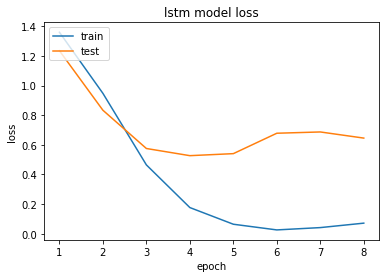

In [233]:
epochs = range(1, len(lstm_history.history['acc']) + 1)
plt.plot(epochs, lstm_history.history['loss'])
plt.plot(epochs, lstm_history.history['val_loss'])
plt.title('lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

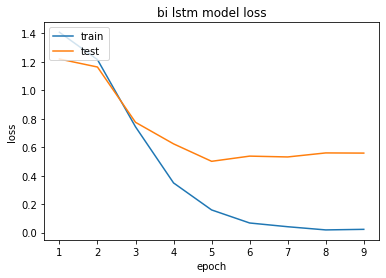

In [234]:
epochs = range(1, len(bilstm_history.history['acc']) + 1)
plt.plot(epochs, bilstm_history.history['loss'])
plt.plot(epochs, bilstm_history.history['val_loss'])
plt.title('bi lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [252]:
test_path =  os.getenv('HOME')+"/aiffel/prj/test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,Unnamed: 0,text
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
4,t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...


In [294]:
df_test.head()

train_data = []
df_test['text'] = df_test['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거

for sentence in tqdm(df_test['text']): #불용어 제거 및 리스트 생성
    tokenized_sentence = s.SampleEncodeAsPieces(sentence,1, 0.0)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    train_data.append(stopwords_removed_sentence)

tokenizer_sp = Tokenizer()
tokenizer_sp.fit_on_texts(train_data)

vocab_size = len(tokenizer_sp.word_index)
train_data = tokenizer_sp.texts_to_sequences(train_data)

max_lan = max(len(review) for review in train_data)

train_data = pad_sequences(train_data, maxlen = max_lan)

# return train_data, vocab_size, tokenizer_sp
train_data

/tmp/ipykernel_7584/1772963469.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['text'] = df_test['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
100%|██████████| 400/400 [00:00<00:00, 1323.44it/s]


array([[   0,    0,    0, ...,  407,  952, 1171],
       [   0,    0,    0, ...,   68,  235,   19],
       [   0,    0,    0, ...,  338, 3505, 2277],
       ...,
       [   0,    0,    0, ...,  479,   25,   99],
       [   0,    0,    0, ...,   19,  198, 3325],
       [   0,    0,    0, ..., 1417,  232,  414]], dtype=int32)

In [295]:
train_data[0]

400

In [296]:
pre_lst = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']

import re
X_test_data, vocab_size, tokenizer_sp = sp_tokenize(df_test)

def predict_(data, load):
#     X_test_data, vocab_size, tokenizer_sp = sp_tokenize(data)
    cls = load.predict(data).tolist()[0].index(max(load.predict(data).tolist()[0]))
    return cls

predict_(X_test_data[0], loaded_model_bilstm)

# loaded_model_bilstm_bt loaded_model_lstm_bt loaded_model_bilstm

/tmp/ipykernel_7584/2772842773.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace("[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]","") #특수문자 제거
100%|██████████| 400/400 [00:00<00:00, 1300.38it/s]


2

In [286]:
loaded_model_lstm.predict(X_test_data[0]).tolist

<function ndarray.tolist>

In [260]:
model_lst = [loaded_model_bilstm_bt, loaded_model_lstm_bt, loaded_model_bilstm, loaded_model_lstm]

X_test_data
no_ls = []
bt_ls = [] 
no_bi = []
bt_bi = []

for i in range(4):
    
    for j in tqdm(range(400)):
        if i ==0:
            bt_bi.append(predict(X_test_data[j], model_lst[i]))
        elif i == 1:
            bt_ls.append(predict(X_test_data[j], model_lst[i]))
        elif i == 2:
            no_bi.append(predict(X_test_data[j], model_lst[i]))
        elif i == 3:
            no_ls.append(predict(X_test_data[j], model_lst[i]))
            

# for i in tqdm(range(400)):
#     no_ls.append(predict(X_test_data[i], loaded_model_lstm))


100%|██████████| 400/400 [00:37<00:00, 10.67it/s]
